### Support vector machine 
- used for classification and regression
- mostly used for classification

***hard margin***
- will try to avoid even single misclassification
- overfitting,can perform poorly on new data
- affected outliers

***Soft margin***
- allows some misclassification
- generalizes better(overfitting)
- not affected by outliers

***kerneltypes***
- linear
- polynomial
- rbf
- sigmoid


In [1]:
from sklearn.datasets import load_wine

In [2]:
wine=load_wine()

In [3]:
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [5]:
print(wine.DESCR)
print(len(wine.feature_names))

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

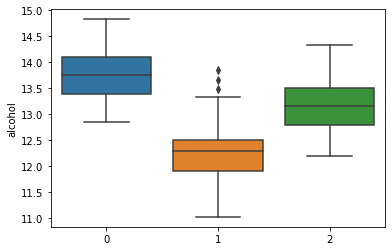

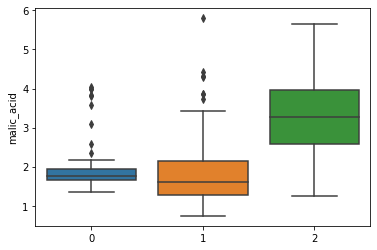

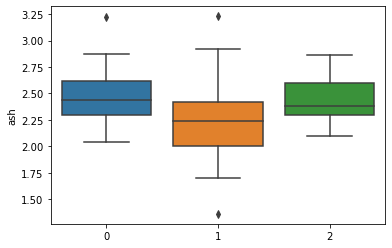

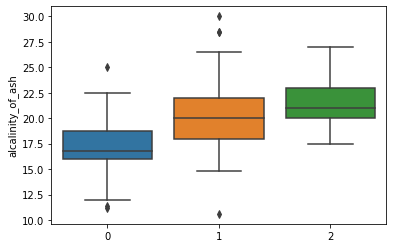

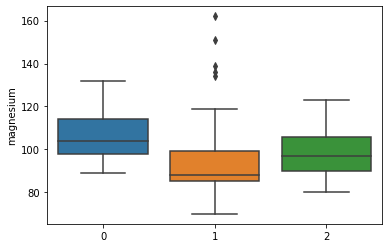

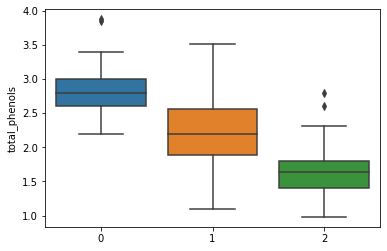

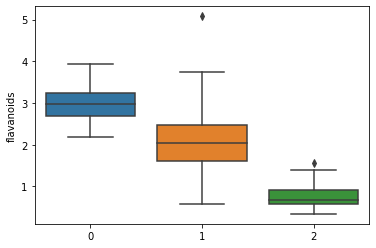

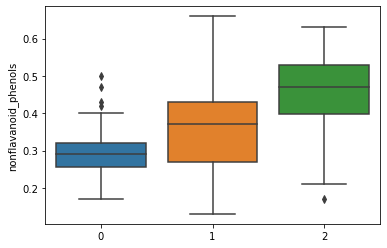

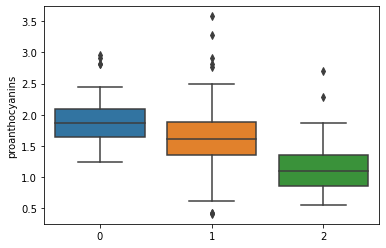

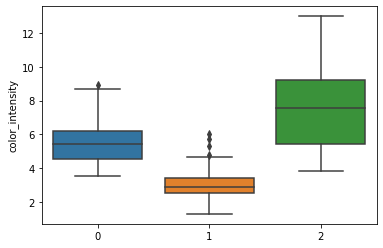

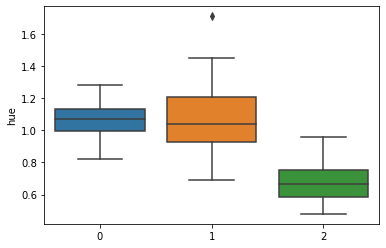

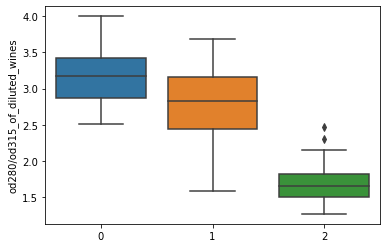

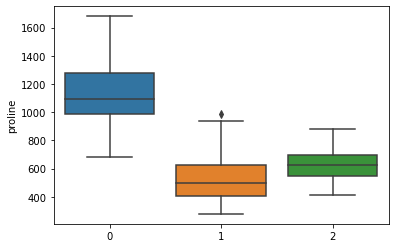

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
y=wine.target
x=wine.data
features=wine.feature_names
for i in range(13):
    sns.boxplot(x=y,y=x[:,i])
    plt.ylabel(features[i])
    plt.show()


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [11]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [16]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6296296296296297

In [14]:
help(SVC())

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each


In [24]:
kernel=["linear","poly",'rbf',"sigmoid"]
for i in kernel:
    model=SVC(kernel=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('for kernel:',i)
    print("Accuarcy is:",accuracy_score(y_test,y_pred))

for kernel: linear
Accuarcy is: 0.9814814814814815
for kernel: poly
Accuarcy is: 0.6666666666666666
for kernel: rbf
Accuarcy is: 0.6851851851851852
for kernel: sigmoid
Accuarcy is: 0.2222222222222222


In [23]:
for i in range(10):
    model=SVC(kernel='poly',degree=i,C=1.0)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('for degree:',i)
    print("Accuarcy is:",accuracy_score(y_test,y_pred))

for degree: 0
Accuarcy is: 0.46296296296296297
for degree: 1
Accuarcy is: 0.7222222222222222
for degree: 2
Accuarcy is: 0.7222222222222222
for degree: 3
Accuarcy is: 0.6666666666666666
for degree: 4
Accuarcy is: 0.6851851851851852
for degree: 5
Accuarcy is: 0.7222222222222222
for degree: 6
Accuarcy is: 0.7037037037037037
for degree: 7
Accuarcy is: 0.7037037037037037
for degree: 8
Accuarcy is: 0.7037037037037037
for degree: 9
Accuarcy is: 0.7037037037037037


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [26]:
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
1.0


In [31]:
from sklearn.svm import SVC
model=SVC(C=0.1,degree=1,kernel='linear')
model.fit(x_train,y_train)

SVC(C=0.1, degree=1, kernel='linear')

In [32]:
y_pred=model.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

1.0

In [34]:
## Try to apply breast cancer dataset to svm
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [35]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])